# DATASET 1 - BANK DATASET 

In [2]:
from sklearn.model_selection import train_test_split
import numpy
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
df = pd.read_csv("C:\\ITM SPRING 2020\\New folder\\BANK_FULL.csv")


d1=pd.get_dummies(df['default'],drop_first=False).rename(columns=lambda x:'default_'+str(x))
d2=pd.get_dummies(df['housing'],drop_first=False).rename(columns=lambda x:'housing_'+str(x))
d3=pd.get_dummies(df['loan'],drop_first=False).rename(columns=lambda x:'loan_'+str(x))
d4=pd.get_dummies(df['marital'],drop_first=False).rename(columns=lambda x:'marital_' + str(x))
d5=pd.get_dummies(df['contact'],drop_first=False).rename(columns=lambda x:'contact_' + str(x))
d6=pd.get_dummies(df['poutcome'],drop_first=False).rename(columns=lambda x:'poutcome_' + str(x))

df.drop(columns =['marital','contact','poutcome','default','housing','loan'],inplace=True)
df=pd.concat([df,d1,d2,d3,d4,d5,d6], axis=1)


job_map       = {'management':1, 'technician':2, 'entrepreneur':3, 'blue-collar':4, 'unknown':5,
                 'retired':6, 'admin.':7 ,'services':8, 'self-employed':9, 'unemployed':10, 'housemaid':11,
                 'student':12}
education_map = {'tertiary':1 ,'secondary':2,'unknown':4, 'primary':3}
month_map     = {'may':5, 'jun':6, 'jul':7 ,'aug':8 ,'oct':10 ,'nov':11, 'dec':12, 'jan':1, 'feb':2 ,'mar':3, 'apr':4 ,'sep':9}
y_map         = {"no":0,"yes":1}

df["job_"]       = df.job.map(job_map)
df["education_"] = df.education.map(education_map)
df["month_"]     = df.month.map(month_map)
df["target"]     = df.y.map(y_map)
df.drop(columns  = ["job","education","month","y"],inplace=True)
data = df.copy()

In [4]:
from sklearn import preprocessing
X_d = data.drop(columns="target")
X   = preprocessing.scale(X_d)
y   = data.target

x_train,  x_test,  y_train,  y_test  = train_test_split(X, y, test_size=0.2, random_state=42)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
k = [5,10,20,30,40]
accuracy_list = []
precision_list = []
recall_list = []
accuracy_list_test = []
precision_list_test = []
recall_list_test = []

for i in k:
    
    knn = KNeighborsClassifier(n_neighbors = i)
    accuracy = cross_val_score(knn, x_train2,y_train2, cv=5, scoring='accuracy').mean()
    precision = cross_val_score(knn, x_train2,y_train2, cv=5, scoring='precision').mean()
    recall = cross_val_score(knn, x_train2,y_train2, cv=5, scoring='recall').mean()

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)


    accuracy_test = cross_val_score(knn, x_test,y_test, cv=2, scoring='accuracy').mean()
    precision_test = cross_val_score(knn, x_test,y_test, cv=2, scoring='precision').mean()
    recall_test = cross_val_score(knn, x_test,y_test, cv=2, scoring='recall').mean()

    accuracy_list_test.append(accuracy_test)
    precision_list_test.append(precision_test)
    recall_list_test.append(recall_test)
    




<function matplotlib.pyplot.show(*args, **kw)>

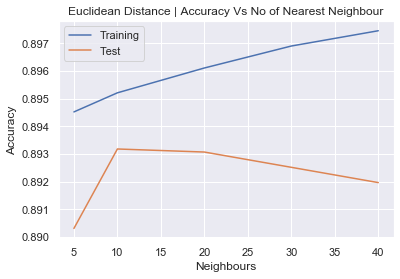

In [22]:
plt.plot(k,accuracy_list,label='Training')
plt.plot(k,accuracy_list_test,label='Test')
plt.xlabel('Neighbours')
plt.ylabel('Accuracy')  
plt.title('Euclidean Distance | Accuracy Vs No of Nearest Neighbour')
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

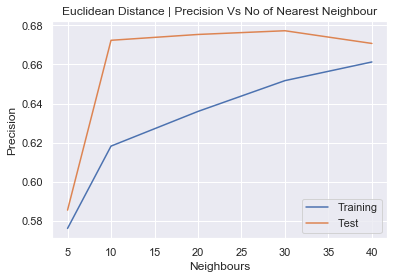

In [23]:
plt.plot(k,precision_list,label='Training')
plt.plot(k,precision_list_test,label='Test')
plt.xlabel('Neighbours')
plt.ylabel('Precision')  
plt.title('Euclidean Distance | Precision Vs No of Nearest Neighbour')
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

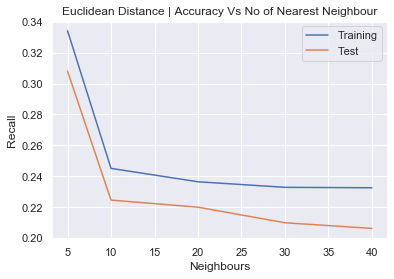

In [24]:
plt.plot(k,recall_list,label='Training')
plt.plot(k,recall_list_test,label='Test')
plt.xlabel('Neighbours')
plt.ylabel('Recall')  
plt.title('Euclidean Distance | Accuracy Vs No of Nearest Neighbour')
plt.legend()
plt.show

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
k = [5,10,20,30,40]
accuracy_list = []
precision_list = []
recall_list = []
accuracy_list_test = []
precision_list_test = []
recall_list_test = []

for i in k:
    
    knn = KNeighborsClassifier(n_neighbors = i, p=1)
    accuracy = cross_val_score(knn, x_train2,y_train2, cv=5, scoring='accuracy').mean()
    precision = cross_val_score(knn, x_train2,y_train2, cv=5, scoring='precision').mean()
    recall = cross_val_score(knn, x_train2,y_train2, cv=5, scoring='recall').mean()

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)


    accuracy_test = cross_val_score(knn, x_test,y_test, cv=2, scoring='accuracy').mean()
    precision_test = cross_val_score(knn, x_test,y_test, cv=2, scoring='precision').mean()
    recall_test = cross_val_score(knn, x_test,y_test, cv=2, scoring='recall').mean()

    accuracy_list_test.append(accuracy_test)
    precision_list_test.append(precision_test)
    recall_list_test.append(recall_test)
    




<function matplotlib.pyplot.show(*args, **kw)>

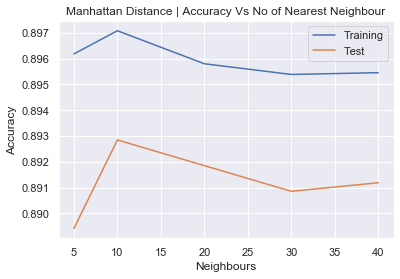

In [26]:
plt.plot(k,accuracy_list,label='Training')
plt.plot(k,accuracy_list_test,label='Test')
plt.xlabel('Neighbours')
plt.ylabel('Accuracy')  
plt.title('Manhattan Distance | Accuracy Vs No of Nearest Neighbour')
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

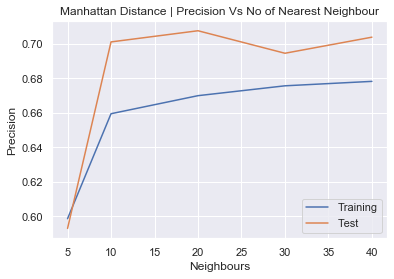

In [27]:
plt.plot(k,precision_list,label='Training')
plt.plot(k,precision_list_test,label='Test')
plt.xlabel('Neighbours')
plt.ylabel('Precision')  
plt.title('Manhattan Distance | Precision Vs No of Nearest Neighbour')
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

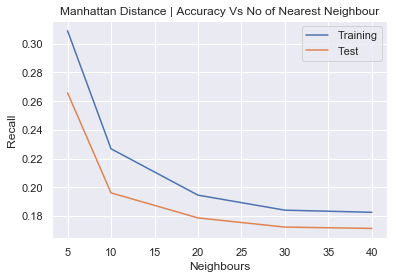

In [28]:
plt.plot(k,recall_list,label='Training')
plt.plot(k,recall_list_test,label='Test')
plt.xlabel('Neighbours')
plt.ylabel('Recall')  
plt.title('Manhattan Distance | Accuracy Vs No of Nearest Neighbour')
plt.legend()
plt.show

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(iris.target, y_pred, pos_label=2)
metrics.auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.show()

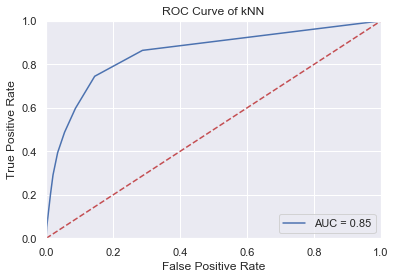

In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train,y_train)

y_scores = knn.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

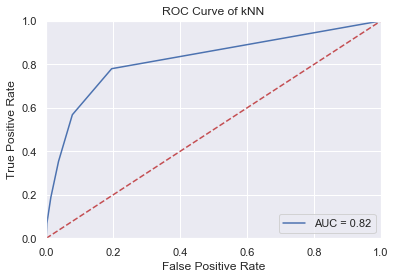

In [30]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)

y_scores = knn.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

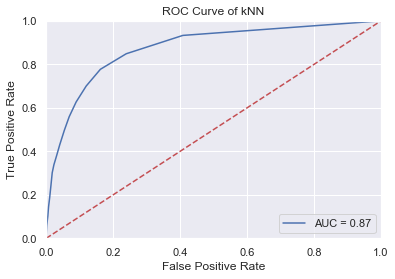

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(x_train,y_train)

y_scores = knn.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

# DATASET 2 - GPU RUN TIME PREDICTION

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 

#importing the data
dt = pd.read_csv("C:\\ITM SPRING 2020\\ML\\sgemm_product_dataset\\processed_sgemm_product.csv")
df = dt.copy()

#classifying numeric runtime into two classes. Run time higher than 250 is 0 and lower will be 1
df['target'] = np.where(df['MeanRun']>100, 0, 1)

#dropping the numeric target column
df.drop('MeanRun',axis=1,inplace=True)

#As SVM takes long time to run, sampling only 25000 records for running this algorithm
dt = df.sample(n = 50000)

#
X_dataset=dt.drop(columns=['target'])
y=dt['target']

from sklearn import preprocessing
X = preprocessing.scale(X_dataset)

In [34]:

x_train,  x_test,  y_train,  y_test  = train_test_split(X, y, test_size=0.2, random_state=42)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [36]:
#Metric used : Euclidean
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
k = [5,10,20,30,40]
accuracy_list = []
precision_list = []
recall_list = []
accuracy_list_test = []
precision_list_test = []
recall_list_test = []

for i in k:
    
    knn = KNeighborsClassifier(n_neighbors = i)
    accuracy = cross_val_score(knn, x_train2,y_train2, cv=5, scoring='accuracy').mean()
    precision = cross_val_score(knn, x_train2,y_train2, cv=5, scoring='precision').mean()
    recall = cross_val_score(knn, x_train2,y_train2, cv=5, scoring='recall').mean()

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)


    accuracy_test = cross_val_score(knn, x_test,y_test, cv=2, scoring='accuracy').mean()
    precision_test = cross_val_score(knn, x_test,y_test, cv=2, scoring='precision').mean()
    recall_test = cross_val_score(knn, x_test,y_test, cv=2, scoring='recall').mean()

    accuracy_list_test.append(accuracy_test)
    precision_list_test.append(precision_test)
    recall_list_test.append(recall_test)
    




<function matplotlib.pyplot.show(*args, **kw)>

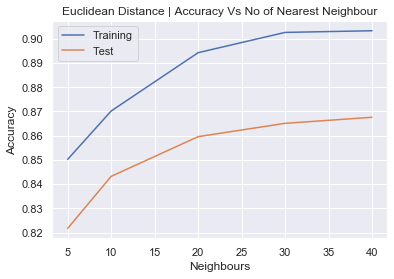

In [37]:
plt.plot(k,accuracy_list,label='Training')
plt.plot(k,accuracy_list_test,label='Test')
plt.xlabel('Neighbours')
plt.ylabel('Accuracy')  
plt.title('Euclidean Distance | Accuracy Vs No of Nearest Neighbour')
plt.legend()
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

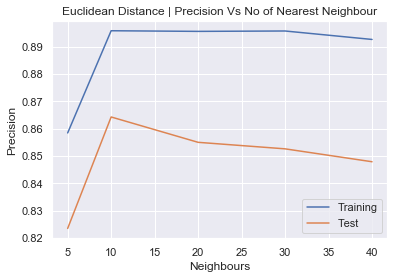

In [38]:
plt.plot(k,precision_list,label='Training')
plt.plot(k,precision_list_test,label='Test')
plt.xlabel('Neighbours')
plt.ylabel('Precision')  
plt.title('Euclidean Distance | Precision Vs No of Nearest Neighbour')
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

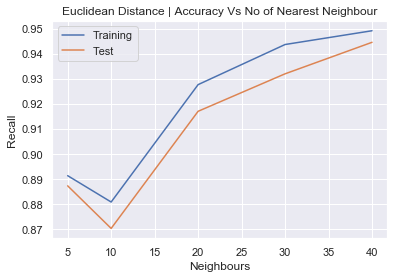

In [39]:
plt.plot(k,recall_list,label='Training')
plt.plot(k,recall_list_test,label='Test')
plt.xlabel('Neighbours')
plt.ylabel('Recall')  
plt.title('Euclidean Distance | Accuracy Vs No of Nearest Neighbour')
plt.legend()
plt.show

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
k = [5,10,20,30,40]
accuracy_list = []
precision_list = []
recall_list = []
accuracy_list_test = []
precision_list_test = []
recall_list_test = []

for i in k:
    
    knn = KNeighborsClassifier(n_neighbors = i, p=1)
    accuracy = cross_val_score(knn, x_train2,y_train2, cv=5, scoring='accuracy').mean()
    precision = cross_val_score(knn, x_train2,y_train2, cv=5, scoring='precision').mean()
    recall = cross_val_score(knn, x_train2,y_train2, cv=5, scoring='recall').mean()

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)


    accuracy_test = cross_val_score(knn, x_test,y_test, cv=2, scoring='accuracy').mean()
    precision_test = cross_val_score(knn, x_test,y_test, cv=2, scoring='precision').mean()
    recall_test = cross_val_score(knn, x_test,y_test, cv=2, scoring='recall').mean()

    accuracy_list_test.append(accuracy_test)
    precision_list_test.append(precision_test)
    recall_list_test.append(recall_test)
    




<function matplotlib.pyplot.show(*args, **kw)>

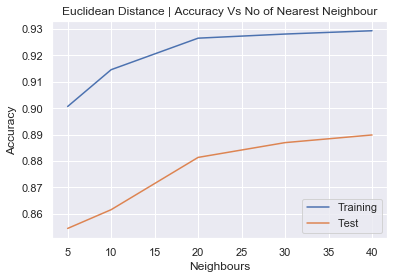

In [41]:
plt.plot(k,accuracy_list,label='Training')
plt.plot(k,accuracy_list_test,label='Test')
plt.xlabel('Neighbours')
plt.ylabel('Accuracy')  
plt.title('Manhattan Distance | Accuracy Vs No of Nearest Neighbour')
plt.legend()
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

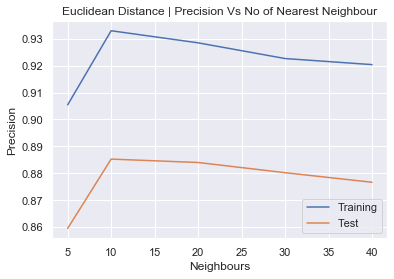

In [42]:
plt.plot(k,precision_list,label='Training')
plt.plot(k,precision_list_test,label='Test')
plt.xlabel('Neighbours')
plt.ylabel('Precision')  
plt.title('Manhattan Distance | Precision Vs No of Nearest Neighbour')
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

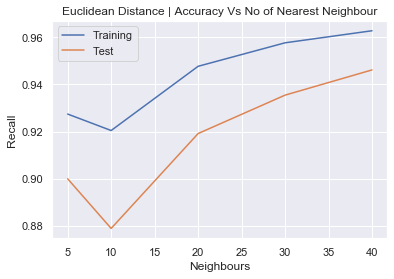

In [43]:
plt.plot(k,recall_list,label='Training')
plt.plot(k,recall_list_test,label='Test')
plt.xlabel('Neighbours')
plt.ylabel('Recall')  
plt.title('Manhattan Distance | Accuracy Vs No of Nearest Neighbour')
plt.legend()
plt.show